# 🧭 Model Testing 
This step covering:
* Prediction on the test set (without target labels)
* Model interpretability using SHAP

In [8]:
import pandas as pd

import sys
sys.path.append(r'E:\USW\Project\car_insurance_claim_prediction\src')

import os
os.chdir(r'E:\USW\Project\car_insurance_claim_prediction\notebooks')

import importlib
import model_testing as mt
import model_selection as ms
import model_evaluation as me

# Reload if the module was modified
importlib.reload(mt)
importlib.reload(ms)
importlib.reload(me)


# Load model and features
model = me.load_pickle_model("../models/final_XGboost_model.pkl")
selected_features = ms.load_selected_features('../outputs/mi_features.csv')
test_data_path = "../data/processed/cleaned_test_data.csv"

## 1. ⏳ Load test data

In [2]:
# Load test data and predict using best model (assume XGBoost here)
df_test = pd.read_csv('../data/processed/cleaned_test_data.csv')
X_test = df_test[selected_features]

## 2. 🔄 Test Prediction

In [11]:
# Predict probabilities and class labels using threshold 0.2
probs = model.predict_proba(X_test)[:, 1]
test_predictions = (probs >= 0.15).astype(int)

# Add prediction results to the original test data
test_data_with_predictions = X_test.copy()
test_data_with_predictions['Predicted_Prob'] = probs
test_data_with_predictions['Predicted_Label'] = test_predictions

# Reset index if needed and save to CSV
test_data_with_predictions.reset_index(inplace=True)
test_data_with_predictions.rename(columns={'index': 'ID'}, inplace=True)  # If index is ID

# Save full data with predictions
test_data_with_predictions.to_csv("../outputs/test_predictions_full.csv", index=False)

# Summary stats
print("Predicted claims:", test_predictions.sum())
print("Claim rate:", test_predictions.mean())


Predicted claims: 11960
Claim rate: 0.30617208099736326


In [7]:
# Load original test file with policy_id
original_test = pd.read_csv('../data/raw/test.csv')

# Load the predictions (without policy_id)
predictions = pd.read_csv('../outputs/test_predictions_full.csv')

# Check if the number of rows match
assert len(original_test) == len(predictions), "Mismatch in row count!"

# Add policy_id to the predictions
predictions['policy_id'] = original_test['policy_id']

# Reorder if needed
predictions = predictions[['policy_id'] + [col for col in predictions.columns if col != 'policy_id']]

# Save updated predictions
predictions.to_csv('../outputs/test_predictions_with_id.csv', index=False)


## 3. ✅ Interpret the model

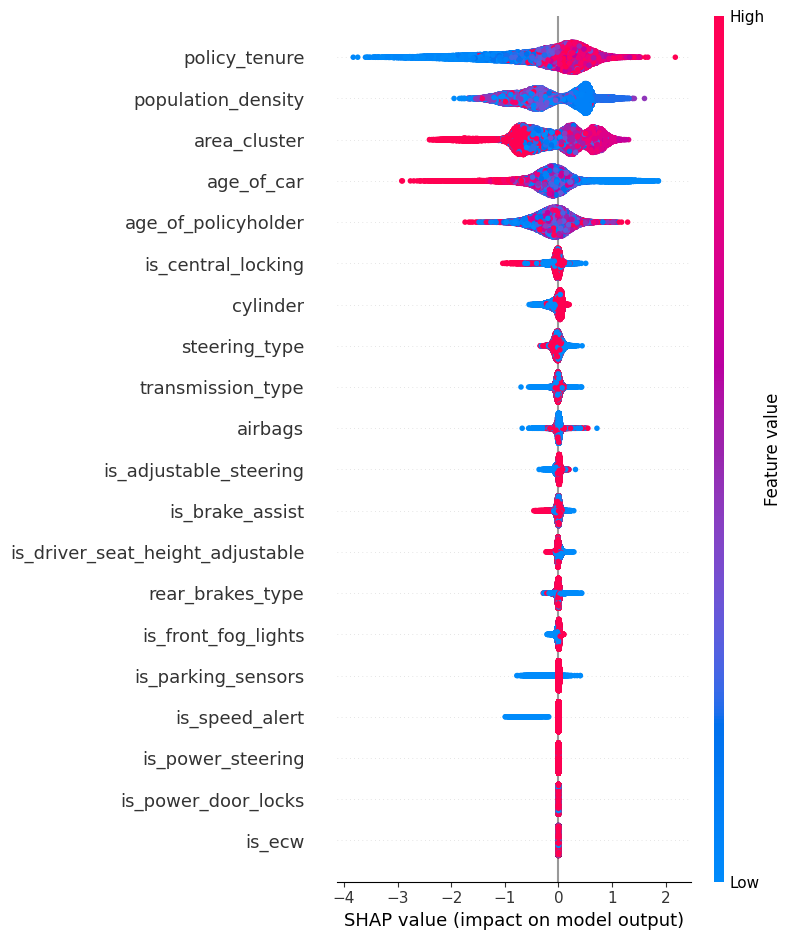

In [ ]:
# Interpret the model
mt.explain_with_shap(model, X_test)

Features at the top like age_of_car, age_of_policyholder, and policy_tenure are most influential.